# EUR-USD and EUR-RUB Exchange Rate Evolution in 2020 (the COVID Pandemic)

<img src="https://cdn.pixabay.com/photo/2018/04/24/13/34/golden-3346988__340.jpg"/>

## Introduction

The goal of this project is to explore the evolution of the exchange rates between the following currencies:

- EUR-USD
- EUR-RUB (the Russian Rouble)

For each pair of currencies, we'll identify the main political and/or economical factors that influenced exchange rate dynamics during the coronavirus pandemic in 2020.

The [dataset](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) we'll use describes the euro daily exchange rates for different currencies from 1999 till 2021. The data was gathered by Daria Chemkaeva from the European Central Bank data source.

### Summary of Results

We found out that while in the USA the COVID trends had a significant impact on the EUR-USD exchange rate resulting in its rapid and almost constant growth till the end of the year, in Russia the main factors that influenced the EUR-RUB exchange rate up to reaching its historical maximum were dramatic Urals oil price fluctuations and the international scandal related to the poisoning of Alexei Navalny.

## Loading Data and Initial Exploration

Let's start by importing the required libraries and loading the dataset for exploration.

In [30]:
import warnings
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

# Enables Jupyter to display graphs
%matplotlib inline
# Ignore warnings
warnings.filterwarnings('ignore')
# Display all columns
pd.set_option('display.max_columns', None)

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

The dataset has been loaded. Next we'll inspect the first and last five rows to understand the structure of the dataset, also, we'll look at some basic facts about the dataset using `DataFrame.info()`.

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,NaN,0.90128,NaN,9.4982,7.5690,359.62,17247.33,3.8981,89.7975,155.5,127.26,1337.90,NaN,NaN,NaN,24.4718,4.9359,10.2863,1.6883,58.947,4.5113,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,NaN,0.90190,NaN,9.5176,7.5660,357.79,17259.99,3.9027,90.0455,155.3,127.13,1342.29,NaN,NaN,NaN,24.2552,4.9570,10.3435,1.6907,59.043,4.4998,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,NaN,0.90635,NaN,9.5659,7.5595,357.86,17168.20,3.9289,90.2040,156.3,127.03,1339.30,NaN,NaN,NaN,24.3543,4.9482,10.3810,1.6916,59.296,4.5160,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,NaN,0.90333,NaN,9.5136,7.5588,360.27,17075.10,3.9277,89.8670,156.1,126.25,1335.85,NaN,NaN,NaN,24.5860,4.9293,10.4713,1.7036,59.020,4.5473,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,NaN,0.90160,NaN,9.5330,7.5565,361.32,17062.67,3.9430,89.7890,156.1,126.62,1332.03,NaN,NaN,NaN,24.3031,4.9264,10.4440,1.7065,59.058,4.5475,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

We find some interesting insights about the dataset which we'll talk about in our observation but before that let's calculate the percentage of missing values in each column:

In [6]:
print(f'\033[1mMISSING DATA:\033[0m\n{round(exchange_rates.isnull().sum() * 100/len(exchange_rates))}')

MISSING DATA:
Period\Unit:                 0.0
[Australian dollar ]         0.0
[Bulgarian lev ]             7.0
[Brazilian real ]            5.0
[Canadian dollar ]           0.0
[Swiss franc ]               0.0
[Chinese yuan renminbi ]     5.0
[Cypriot pound ]            59.0
[Czech koruna ]              0.0
[Danish krone ]              0.0
[Estonian kroon ]           45.0
[UK pound sterling ]         0.0
[Greek drachma ]            91.0
[Hong Kong dollar ]          0.0
[Croatian kuna ]             5.0
[Hungarian forint ]          0.0
[Indonesian rupiah ]         0.0
[Israeli shekel ]            5.0
[Indian rupee ]              5.0
[Iceland krona ]            42.0
[Japanese yen ]              0.0
[Korean won ]                0.0
[Lithuanian litas ]         27.0
[Latvian lats ]             31.0
[Maltese lira ]             59.0
[Mexican peso ]              0.0
[Malaysian ringgit ]         0.0
[Norwegian krone ]           0.0
[New Zealand dollar ]        0.0
[Philippine peso ]           

At this point, we can make following obervations:
- There are 5,699 rows and 41 columns in the dataset. Each entry represents a working day from `1999-01-04` till `2021-01-08` inclusive. Each column, apart from the first one, represents a currency to euro rate, for 40 different currencies.
- Many columns don't have missing values at all, while some have a high percentage of them: 91% for Greek drachma, 63% for Slovenian tolar.
- 3 of 41 columns are of float type, all the other columns are of object type. We should consider converting the first column with the dates into datetime and the others, representing numerical information, into float.

## Data Cleaning

For the sconpe of our analysis, we're interested only in the columns `Period\Unit:`, `[US dollar ]`, and `[Russian rouble ]`. Hence, we'll  focus on cleaning only them.

In [7]:
# Rename the columns
# Note: To avoid error we have to produce a raw string of column 'Period\Unit'
exchange_rates.rename(columns={r'Period\Unit:': 'Time',
                               '[US dollar ]': 'US_dollar',
                               '[Russian rouble ]': 'Russian_rouble'}, inplace=True)

# Convert 'Time' column to a datetime datatype
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# Sort the values by 'Time' in ascending order
exchange_rates.sort_values('Time', inplace=True)

# Reset the index (and drop the initial index)
exchange_rates.reset_index(drop=True, inplace=True)

In [8]:
# Isolate the necessary columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_rouble = exchange_rates[['Time', 'Russian_rouble']]

# Check the frequency table of EUR-USD and EUR-RUB
freq_eur_usd = euro_to_dollar['US_dollar'].value_counts()
freq_eur_rub = euro_to_rouble['Russian_rouble'].value_counts()

print(f'Frequency table of EUR-USD:\n{freq_eur_usd}')
print()
print(f'Frequency table of EUR-RUB:\n{freq_eur_rub}')

Frequency table of EUR-USD:
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64

Frequency table of EUR-RUB:
-          62
40.6500     4
39.6750     4
35.2250     4
40.5950     4
           ..
33.9845     1
34.1550     1
34.0890     1
34.0440     1
90.8000     1
Name: Russian_rouble, Length: 5413, dtype: int64


In both DataFrames, we have a wrong value `-` for the corresponding exchange rates, which resulted in these columns to be a string data type. Practically, those are missing values that should be dropped or dealt accordingly. In our case, we're going to drop rows where the `-` character appears.

In [9]:
# Keeping only the valid values in both DataFrames
euro_to_dollar = euro_to_dollar[~euro_to_dollar['US_dollar'].str.contains('-')]
euro_to_rouble = euro_to_rouble[~euro_to_rouble['Russian_rouble'].str.contains('-')]

# Convert 'US_dollar' and 'Russian_rouble' datatype into float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_rouble['Russian_rouble'] = euro_to_rouble['Russian_rouble'].astype(float)

Now that we created and cleaned the DataFrames for both currencies in interest, let's focus on each of them at turns.

## EUR-USD Exchange Rate Evolution

### General trend

Let's start with creating a line plot to visualize the evolution of the EUR-USD exchange rate for the whole period of time. Since we are interested in a general trend of this evolution, we'd rather see a smooth line for long-term upward and downward changes, without small wiggles due to the daily variation in the exchange rate. For these purposes, we can use the concept of **rolling mean** (or [moving average](https://en.wikipedia.org/wiki/Moving_average)). The principle behind this is that if we apply a larger rolling window, we'll get a smoother line, with reduced noise.

In our case, a reasonable rolling window is 30 days (i.e. 1 month). This approach will alow increasing the data-ink ratio without losing any important information, and as a result, will facilitate focusing on long-term trends rather than the noise.

In [10]:
# Create a column with smoothed values of EUR-USD exchange rates
euro_to_dollar['rolling_mean_30'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean_30
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


Now, we'll plot 2 graphs to see the difference:
1. EUR-USD exchange rate evolution without rolling mean
2. EUR-USD exchange rate evolution with rolling mean

In [100]:
def create_line_plot(df, target_col, xlabel, title, title_font=20, label_font=14,
                     x_min='1999-01-01', x_max='2021-01-08', y_min=None, y_max=None):
    '''
        Creates line plot to visualize currencies trends.
        
        Params:
            df (dataframe): dataframe of interest
            target_col (str): currency column (with or without rolling mean)
            xlabel (str): label on the x-axis
            title (str): graph title
            title_font (int): title font size (default: 20)
            label_font (int): label font size (default: 14)
            x_min (str): minimum x-axis limit (default: '1999-01-01')
            x_max (str): maximum x-axis limit (default: '2021-01-08')
            y_min (int): minimum x-axis limit (default: None)
            y_max (int): maximum x-axis limit (default: None)
            
        Returns: Line plot with given arguments.
    '''
    plt.plot(df['Time'], df[target_col], color='slateblue')
    plt.title(title, fontsize=title_font)
    plt.xlabel(xlabel, fontsize=label_font)
    plt.ylabel('Exchange rate', fontsize=label_font)
    # convert x_min and x_max from string to datetime format
    plt.xlim([pd.to_datetime(x_min),
              pd.to_datetime(x_max)])
    plt.ylim([y_min, y_max])
    sns.despine()

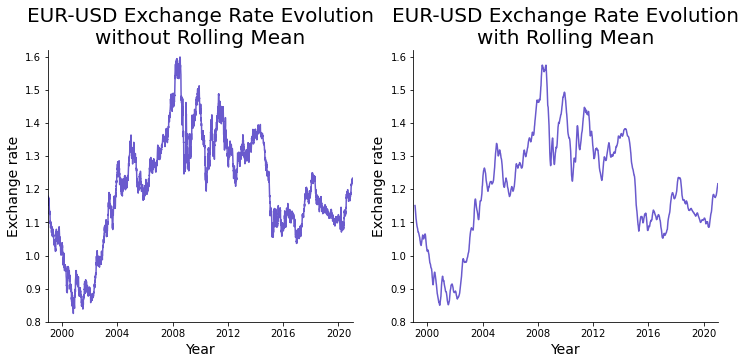

In [101]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
create_line_plot(df=euro_to_dollar, target_col='US_dollar', xlabel='Year',
                 title='EUR-USD Exchange Rate Evolution\nwithout Rolling Mean',
                 y_min=0.8, y_max=1.62)

plt.subplot(1,2,2)
create_line_plot(df=euro_to_dollar, target_col='rolling_mean_30', xlabel='Year',
                 title='EUR-USD Exchange Rate Evolution\nwith Rolling Mean',
                 y_min=0.8, y_max=1.62)

plt.show()

As we expected, the second graph is much easier to interpret. We can distinguish various features on it. Initial decrease lasted up until 2003 and followed by a rapid increase. After a series of going up and down, we observe a clear sharp drop at the end of 2015, followed by some fluctuations at lower levels.

Obviously, over the last 22 years, a lot of events happened in the USA both at national and international scales that influenced the EUR-USD exchange rate variation. The graph above can tell us numerous stories, but the one we want to visualize and explore in this project is **how the EUR-USD rate has changed during the coronavirus pandemic**.

### Developing the Storytelling Idea

Let's start with reproducing the graph above, for now without any particular adjustments, zooming in only the period of interest (`2019-12-01` to `2021-01-01`) and limiting the y-axis to discern the changes in more detail.

In [ ]:
create_line_plot(df=euro_to_dollar, target_col='rolling_mean_30', xlabel='Year',
                 title='EUR-USD Exchange Rate Evolution\nwith Rolling Mean',
                 title_font=16, label_font=14, y_min=0.8, y_max=1.62)

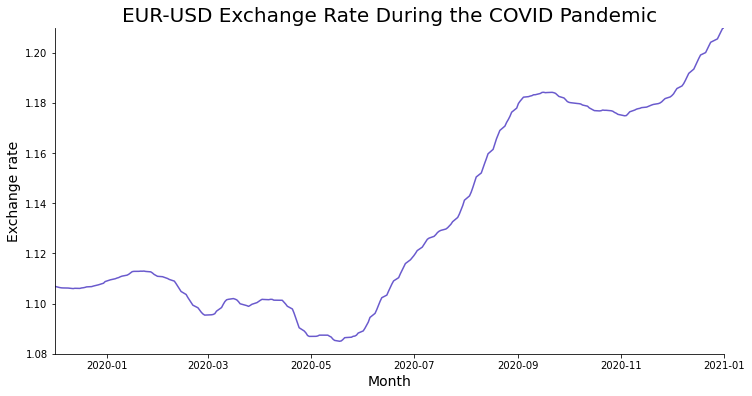

In [102]:
plt.figure(figsize=(12,6))
create_line_plot(df=euro_to_dollar, target_col='rolling_mean_30', xlabel='Month',
                 title='EUR-USD Exchange Rate During the COVID Pandemic',
                 x_min='2019-12-01', x_max='2021-01-01', y_min=1.08, y_max=1.21)

plt.show()